In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (8, 6)

# The Euclidean Plane

The n-dimensional *Euclidean plane* is the set of all tuples of the form $(x_1, ..., x_n)$, where $x_i \in \mathbb{R}$. We'll just work with $\mathbb{R}^2$ and $\mathbb{R}^3$.

## Points, tangent vectors, vector fields$

A *point* $p=(x,y,z)$ determines an absolute position in space, while a *tangent vector* $(p, v)$ originates at a point $p$ and has a magnitude and direction specified by $v$. We can talk about *functions* on $\mathbb{R}^3$ which map a point $(x,y,z)$ to some scalar value $f(x, y, z)$. 

A *vector field* is a function $F(p)$, $F:\mathbb{R}^3 \rightarrow \mathbb{R}^3$ that assigns a tangent vector $F(p) = v \in \mathbb{R}^3$ to each point $p \in \mathbb{R}^3$. There are a few ways of writing a vector field. The first is as a vector of functions:

$$F(x, y, z) = \begin{pmatrix}f_1(x, y, z)\\f_2(x, y, z)\\f_3(x, y, z)\end{pmatrix}$$

Another way, from physics, is to use the basis vectors $\hat{i}$, $\hat{j}$, $\hat{k}$:

$$F(x, y, z) = f_1(x, y, z) ~ \hat{i} + f_2(x, y, z) ~ \hat{j} + f_3(x, y, z) ~ \hat{k}$$

The basis vectors are equal to the *natural basis* of $\mathbb{R}^3$:

$$\hat{i} = \begin{pmatrix}1\\0\\0\end{pmatrix} ~~~ \hat{j} = \begin{pmatrix}0\\1\\0\end{pmatrix} ~~~ \hat{k} = \begin{pmatrix}0\\0\\1\end{pmatrix}$$

Here are some examples of 2D vector fields, where the magnitude of the vector is represented by it's length:

Text(0.5,1,'$F(x,y)=-cos(x)sin(y) \\hat{i} + cos(y) \\hat{j}$')

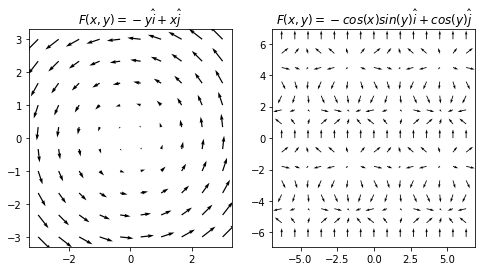

In [49]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = plt.subplot(1, 2, 1)
xx = np.linspace(-3, 3, 10)
# generate the locations of the points
X,Y = np.meshgrid(xx, xx)
# evaluate the vector field on the points
U = -Y
V = X
plt.quiver(X, Y, U, V)
plt.title('$F(x,y)=-y \hat{i} + x \hat{j}$')

ax = plt.subplot(1, 2, 2)
xx = np.linspace(-2*np.pi, 2*np.pi, 15)
X,Y = np.meshgrid(xx, xx)
U = -np.cos(X)*np.sin(Y)
V = np.cos(Y)
plt.quiver(X, Y, U, V)
plt.title('$F(x,y)=-cos(x)sin(y) \hat{i} + cos(y) \hat{j}$')

Here is an example of a three dimensional vector field, where the points are black dots, and the vectors are displayed as arrows that originate from their respective points, with a length equal to their magnitude (scaled for visualization):

Text(0.5,0.92,'$F(x,y,z)=-0.5y \\hat{i} + 0.5x \\hat{j} + (1 + exp(-z))^{-1} \\hat{k}$')

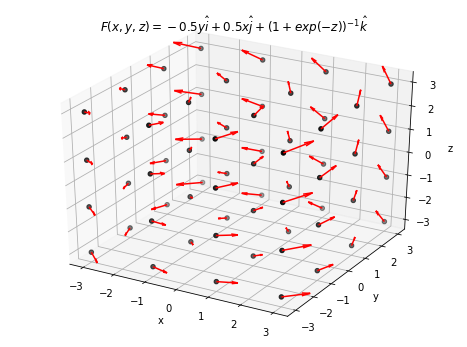

In [50]:
def plot_3d_vector_field(F, xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3), num_grid_points=4, use_color=False):
    """ 
        Plot a 3D vector field with fixed height arrows, and indicate the magnitude
        by the color.
        
        F: a function that takes input x, y, z, each of which are numpy arrays of length
        N. The values x[i], y[i], z[i] comprise a single point. The function F should
        return u, v, w, where u[i], v[i], w[i] represent a vector at point (x[i], y[i], z[i]).
                
        xlim, ylim, zlim: Tuples equal to (lower_bound, upper_bound) for each axis.
        
        num_grid_points: The number of points along each axis to evaluate F.
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # create a grid to evaluate the function F
    X,Y,Z = np.meshgrid(np.linspace(xlim[0], xlim[1], num_grid_points),
                        np.linspace(ylim[0], ylim[1], num_grid_points),
                        np.linspace(zlim[0], zlim[1], num_grid_points))
    
    # evaluate the vector field at all the points
    U, V, W = F(X.ravel(), Y.ravel(), Z.ravel())
                    
    # set a color vector equal to the magnitude of each point
    if use_color:
        cmap = plt.cm.seismic
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        c = magnitude / magnitude.max()
        c = cmap(c)
    else:
        c = 'r'
    
    # plot the points
    ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c='k')
           
    # determine the vector display length
    len_frac = int(use_color)*0.25 + 0.25
    lim = np.array([xlim, ylim, zlim])
    rng = lim[:, 1] - lim[:, 0]
    max_rng = rng.max()
    vlen = len_frac*(max_rng / num_grid_points)
        
    # plot the vector field    
    ax.quiver(X, Y, Z, 
               U.reshape(X.shape), V.reshape(Y.shape), W.reshape(Z.shape),
               length=vlen,               
               color=c,
               normalize=use_color
               )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

plt.rcParams["figure.figsize"] = (8, 6)
def F(x, y, z): return -y*0.5, x*0.5, 1 / (1 + np.exp(-z))
plot_3d_vector_field(F)    
plt.title('$F(x,y,z)=-0.5y \hat{i} + 0.5x \hat{j} + (1 + exp(-z))^{-1} \hat{k}$')
    

A *differential equation* can also be considered a vector field:

$$\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix} = \begin{pmatrix}f_1(x, y, z)\\f_2(x, y, z)\\f_3(x, y, z)\end{pmatrix}$$

Each point in space $(x, y, z)$ is assigned a tangent vector equal to $\dot{x} ~ \hat{i} + \dot{y} ~ \hat{j} + \dot{z} ~ \hat{k}$. For example there is a vector field for the [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system), a famous 3D system that exibits chaotic dynamics:

$$\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix} = \begin{pmatrix}10(y-x)\\x(28-z) - y\\xy - \frac{8}{3} z\end{pmatrix}$$

We can plot the Lorenz equations as a vector field in three dimensional space, using color to indicate the magnitude of each vector instead of length:

Text(0.5,0.92,'$F(x,y,z)=-0.5y \\hat{i} + 0.5x \\hat{j} + (1 + exp(-z))^{-1} \\hat{k}$')

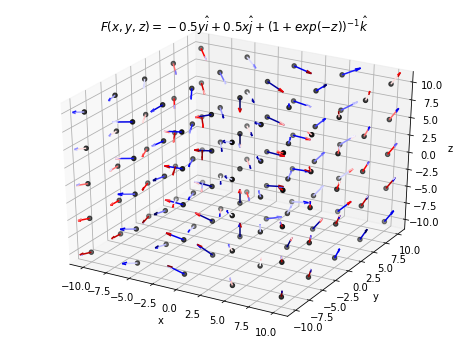

In [51]:
plt.rcParams["figure.figsize"] = (8, 6)
def F(x, y, z): return 10*(y-x), x*(28-z)-y, x*y - (8 / 3)*z
plot_3d_vector_field(F, use_color=True, xlim=(-10, 10), ylim=(-10, 10), zlim=(-10, 10), num_grid_points=5)    
plt.title('$F(x,y,z)=-0.5y \hat{i} + 0.5x \hat{j} + (1 + exp(-z))^{-1} \hat{k}$')


A particle placed at a point in that space can expect a push in the direction of the arrow with a force proportional to the color of the arrow (blue is weak, red is strong).

## Scalar-valued functions, the gradient, gradient descent

The *gradient* of a scalar-valued function $f:\mathbb{R}^3 \rightarrow \mathbb{R}$ is a vector of partial derivatives of $f$:

$$\nabla f(x, y, z) = \begin{pmatrix}\frac{\partial f}{\partial x}(x, y, z)\\\frac{\partial f}{\partial y}(x, y, z)\\\frac{\partial f}{\partial z}(x, y, z)\end{pmatrix}$$

The gradient of a function defines a vector field associated with that function. Here's a plot of a 2D function $f(x,y) = x^2 + y^2$ and the vector field defined by it's gradient $\nabla f = 2x \hat{i} + 2y \hat{j}$:

Text(0.5,1,'$\\nabla f(x, y) = 2x + 2y$')

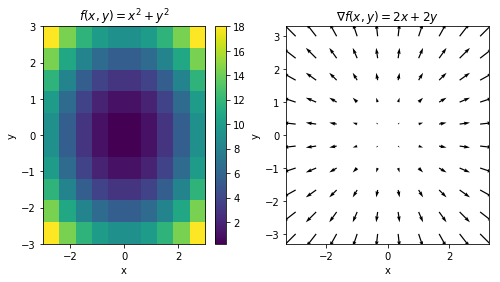

In [57]:
plt.rcParams["figure.figsize"] = (8, 4)
xx = np.linspace(-3, 3, 10)
X,Y = np.meshgrid(xx, xx)
Z = X**2 + Y**2
U = 2*X
V = 2*Y

ax = plt.subplot(1, 2, 1)
plt.imshow(Z, aspect='auto', cmap=plt.cm.viridis, extent=(X.min(), X.max(), Y.min(), Y.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('$f(x, y) = x^2 + y^2$')

ax = plt.subplot(1, 2, 2)
plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$\\nabla f(x, y) = 2x + 2y$')

You can see on the left that the function has a minimum at $f(0, 0)$ and increases as either component increases. The vector field on the right shows the *rate of increase*, a larger arrow indicates that $f(x,y)$ increases faster as the absolute values of $x$ and $y$ increase.

There are probably many wonderful things to say about gradients of scalar-valued functions. One of the most important algorithms in Machine Learning is [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), which seeks to minimize some function $f(\theta)$ where $\theta \in \mathbb{R}^n$ is a vector of *parameters* that are *optimal* when $f(\theta)$ is at it's smallest.

Gradient descent starts with an initial guess $\theta_0 \in \mathbb{R}^n$. At each iteration $k$, it updates the parameter vector in the direction of the gradient of $f(\theta)$:

$$\theta_{k+1} = \theta_k - \gamma \nabla f(\theta_k)$$

## Directional derivatives of scalar-valued functions

In gradient descent, the direction $-\nabla f(\theta_k)$ is often called the *direction of steepest descent*. Why is this? There are many answers in [this stack overflow post](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent). Many of the answers to this question require knowledge of the *directional derivative*. The [directional derivative](https://en.wikipedia.org/wiki/Directional_derivative) of a scalar-valued function $f(x, y, z)$ is a scalar, it tells us how fast $f$ is changing in the direction of a vector $v \in \mathbb{R}^3$. It can be written for a point $(x, y, z)$ as:

$$ D_v f(x, y, z) = v_1 \frac{\partial f}{\partial x}(x, y, z) + v_2 \frac{\partial f}{\partial y}(x, y, z) + v_3 \frac{\partial f}{\partial z}(x, y, z)$$

The directional derivative of a scalar-valued function is the dot product of the vector $v$ and the gradient:

$$D_v f(x, y, z) = \nabla f (x, y, z) \cdot v$$

To reduce clutter, $f(x, y, z)$ will be written as $f$, and $\nabla f(x, y, z)$ will be written as $\nabla f$.

The directional derivative can be used to prove why $\nabla f$ is the direction of steepest *ascent*, so that $-\nabla f$ is the direction of steepest descent. First, recall the relationship between the dot product and the angle between two vectors, which we'll call $\alpha \in [-\pi, \pi]$:

$$\frac{\nabla f \cdot v}{|\nabla f| |v|} = cos(\alpha)$$

Assume $v$ is a unit vector, so that $|v|=1$, and rearrange the equation:

$$\nabla f \cdot v = |\nabla f| cos(\alpha)$$

We want to find the $v$ that maximizes this equation, which by inspection, would be a vector that makes an angle of $\alpha = 0$ with $\nabla f$. This implies that the only direction $v$ that can maximize the directional derivative is $\nabla f$, which is the direction of steepest ascent. It then follows that $-\nabla f$ is the direction of steepest *descent*.













































This is the footer